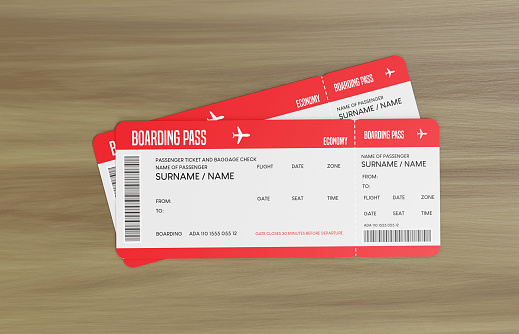

# Flight Price Prediction
#### Problem Statement: 

Anyone who has booked a flight ticket knows how unexpectedly the prices vary. The cheapest 
available ticket on a given flight gets more and less expensive over time. This usually happens as 
an attempt to maximize revenue based on -
1. Time of purchase patterns (making sure last-minute purchases are expensive)
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order 
to reduce sales and hold back inventory for those expensive last-minute expensive 
purchases)
So, you have to work on a project where you collect data of flight fares with other features and 
work to make a model to predict fares of flights.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime
import sklearn
from sklearn.preprocessing import LabelEncoder

import statsmodels.api as sm
from scipy import stats
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression,Lasso,ElasticNet,Ridge
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

In [14]:
#Loading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/jman2031/FR-Flight--Pred/main/Flight%20Price-1.txt")

In [15]:
df

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Price
0,SpiceJet,15-09-2022,Delhi,Cochin,08:45:00,13:15,4h 30m,1 stop,5830
1,Jet Airways,12-11-2022,Delhi,Cochin,14:00:00,12:35 13,22h 35m,1 stop,10262
2,Air India,12-11-2022,Delhi,Cochin,20:15:00,19:15 13,23h,2 stops,13381
3,Jet Airways,27-10-2022,Delhi,Cochin,16:00:00,12:35 28,20h 35m,1 stop,12898
4,GoAir,06-08-2022,Delhi,Cochin,14:10:00,19:20,5h 10m,1 stop,19495
...,...,...,...,...,...,...,...,...,...
10662,Air Asia,09-09-2022,Kolkata,Banglore,19:55:00,22:25,2h 30m,non-stop,4107
10663,Air India,27-09-2022,Kolkata,Banglore,20:45:00,23:20,2h 35m,non-stop,4145
10664,Jet Airways,27-09-2022,Banglore,Delhi,08:20:00,11:20,3h,non-stop,7229
10665,Vistara,01-08-2022,Banglore,New Delhi,11:30:00,14:10,2h 40m,non-stop,12648


### Checking Info of the dataset

In [16]:
type(df)

pandas.core.frame.DataFrame

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10667 entries, 0 to 10666
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10667 non-null  object
 1   Date_of_Journey  10667 non-null  object
 2   Source           10667 non-null  object
 3   Destination      10667 non-null  object
 4   Dep_Time         10667 non-null  object
 5   Arrival_Time     10667 non-null  object
 6   Duration         10667 non-null  object
 7   Total_Stops      10666 non-null  object
 8   Price            10667 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 750.1+ KB


FEATURES:
- Airline: The name of the airline.
- Date_of_Journey: The date of the journey
- Source: The source from which the service begins.
- Destination: The destination where the service ends.
- Dep_Time: The time when the journey starts from the source.
- Arrival_Time: Time of arrival at the destination.
- Duration: Total duration of the flight.
- Total_Stops: Total stops between the source and destination.
- Price: The price of the ticket

In [18]:
df.shape

(10667, 9)

Dataset has 10667 rows and 9 colummns

In [19]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Dep_Time',
       'Arrival_Time', 'Duration', 'Total_Stops', 'Price'],
      dtype='object')

In [20]:
#Knowing null values:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

There is a null value in the Total_stops column

<AxesSubplot:>

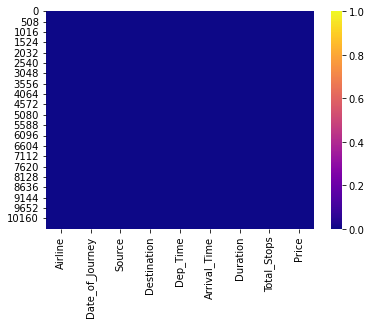

In [21]:
sns.heatmap(df.isnull(),cmap='plasma')

We cant visualize the null value as it is only 1 in the Total_stops column

### Checking the elements/unique values in each columns

In [22]:
df.nunique()

Airline              12
Date_of_Journey      40
Source                5
Destination           6
Dep_Time            222
Arrival_Time        882
Duration            368
Total_Stops           5
Price              1867
dtype: int64

#### Viewing Unique Values in Each Column :

In [23]:
for i in df:
    print(i)
    print(df[i].value_counts())
    print("-"*35)

Airline
Jet Airways                          3844
IndiGo                               2048
Air India                            1748
Multiple carriers                    1195
SpiceJet                              817
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64
-----------------------------------
Date_of_Journey
18-10-2022    504
06-11-2022    503
21-10-2022    497
09-11-2022    494
12-11-2022    493
09-10-2022    483
21-08-2022    423
15-10-2022    405
06-08-2022    403
27-10-2022    381
27-11-2022    355
24-11-2022    349
01-11-2022    341
03-11-2022    333
15-11-2022    328
24-08-2022    322
03-08-2022    314
09-08-2022    302
27-08-2022    299
24-10-2022    286
06-10-2022    282
01-10-2022    276
12-10-2022  

### Imputation:

In [24]:
from sklearn.impute import SimpleImputer
I = SimpleImputer(strategy='most_frequent')
df['Total_Stops']=I.fit_transform(df['Total_Stops'].values.reshape(-1,1)) #1=row,-1=many columns

In [25]:
#Checking the null values:
df['Total_Stops'].isnull().sum()

0

No null values anymore.

### Data Cleaning:

#### Few of the Values in "Airline", "Destination" column have same inofrmation under different subheadings. We need to address those.

In [26]:
#Replacing "Jet Airways Business" as "Jet Airways" in the Airline Column:
df["Airline"] = df["Airline"].replace("Jet Airways Business","Jet Airways")

#Replacing "Multiple carriers Premium economy" as "Multiple carriers" in the Airline column:
df["Airline"] = df["Airline"].replace("Multiple carriers Premium economy","Multiple carriers")

#Replacing "Vistara Premium economy" as "Vistara" in the Airline column:
df["Airline"] = df["Airline"].replace("Vistara Premium economy","Vistara")

#Replacing "New Delhi" as "Delhi" in the Destination column:
df["Destination"] = df["Destination"].replace("New Delhi","Delhi")

#### We extract values from Dep_Time and Arrival_Time and create separate columns as departure/arrival hours

In [27]:
#Extracting Hours
df["Dep_hour"] = pd.to_datetime(df["Dep_Time"]).dt.hour
#Extracting Minutes
df["Dep_min"] = pd.to_datetime(df["Dep_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
df.drop(["Dep_Time"], axis = 1, inplace = True)

In [28]:
#Extracting Hours
df["Arrival_hour"] = pd.to_datetime(df["Arrival_Time"]).dt.hour
#Extracting Minutes
df["Arrival_min"] = pd.to_datetime(df["Arrival_Time"]).dt.minute
#Dropping Dep_Time as it will create duplicity
df.drop(["Arrival_Time"], axis = 1, inplace = True)

#### We need Duration column in same format also for ML.Hence we seperate it in duration hrs and duration minutes.

In [29]:
D=list(df["Duration"])

for i in range(len(D)):
    if len(D[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in D[i]:
            D[i] = D[i].strip() + " 0m"   # Adds 0 minute
        else:
            D[i] = "0h " + D[i]           # Adds 0 hour

#creating empty lists:
duration_hours = []
duration_mins = []
for i in range(len(D)):
    duration_hours.append(int(D[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(D[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [30]:
# Adding duration_hours and duration_mins list to df dataset

df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

df.drop(["Duration"], axis = 1, inplace = True) #Drop the column for no duplicate data.

In [31]:
#checking the changes in the dataset
df.head()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,SpiceJet,15-09-2022,Delhi,Cochin,1 stop,5830,8,45,13,15,4,30
1,Jet Airways,12-11-2022,Delhi,Cochin,1 stop,10262,14,0,12,35,22,35
2,Air India,12-11-2022,Delhi,Cochin,2 stops,13381,20,15,19,15,23,0
3,Jet Airways,27-10-2022,Delhi,Cochin,1 stop,12898,16,0,12,35,20,35
4,GoAir,06-08-2022,Delhi,Cochin,1 stop,19495,14,10,19,20,5,10


#### Dropping duplicates in dataset

In [32]:
print("Rows and Columns before dropping duplicates: ", df.shape)
df.drop_duplicates(inplace=True)
print("Rows and Columns after dropping duplicates: ", df.shape)

Rows and Columns before dropping duplicates:  (10667, 12)
Rows and Columns after dropping duplicates:  (10445, 12)


# Visualization of the data

#### UNIVARIATE ANALYSIS :

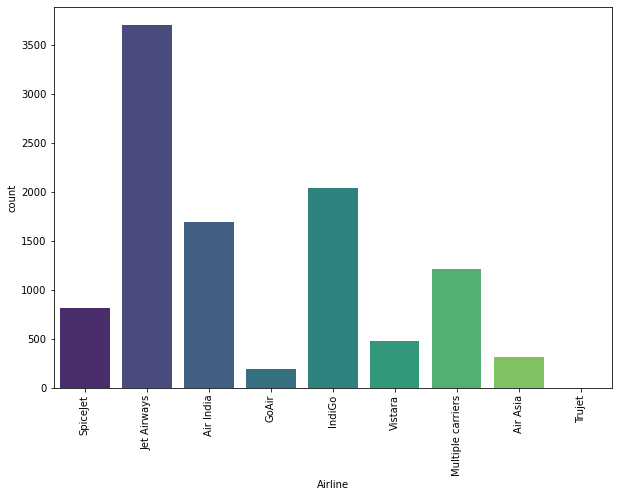

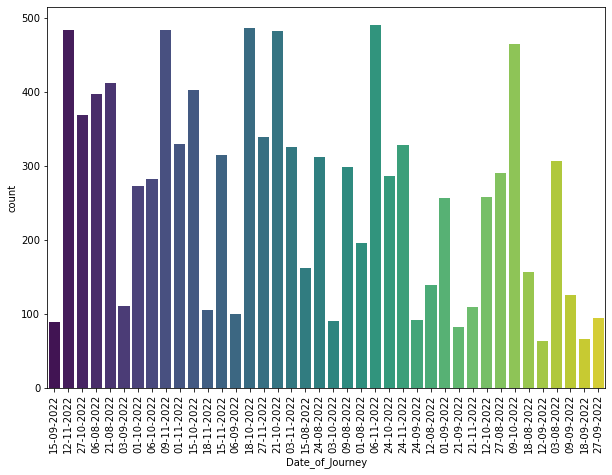

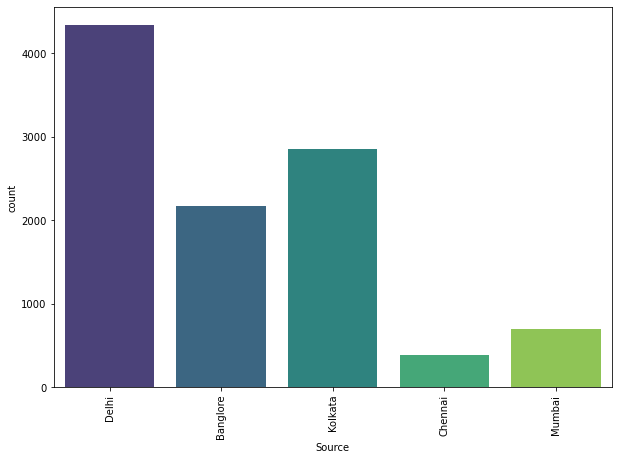

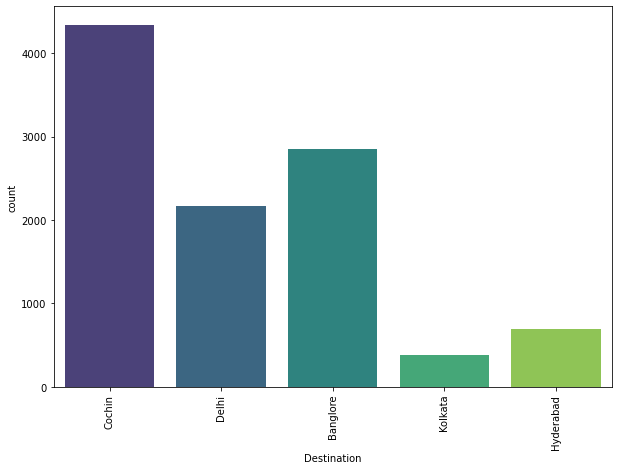

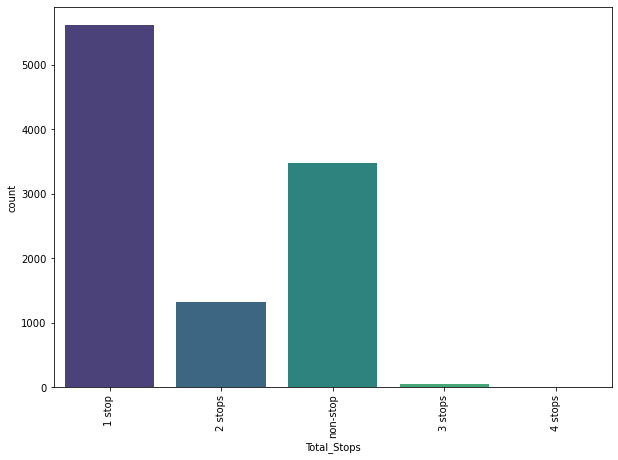

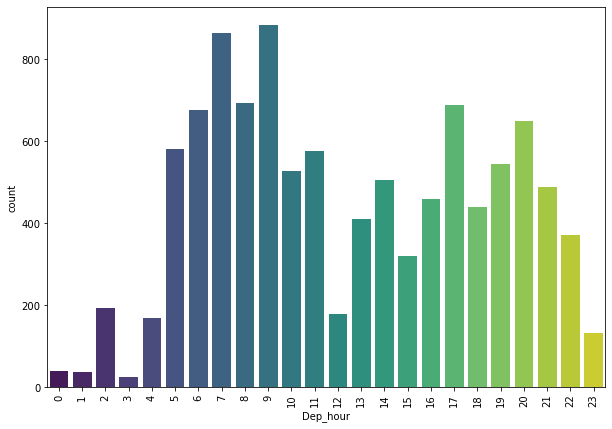

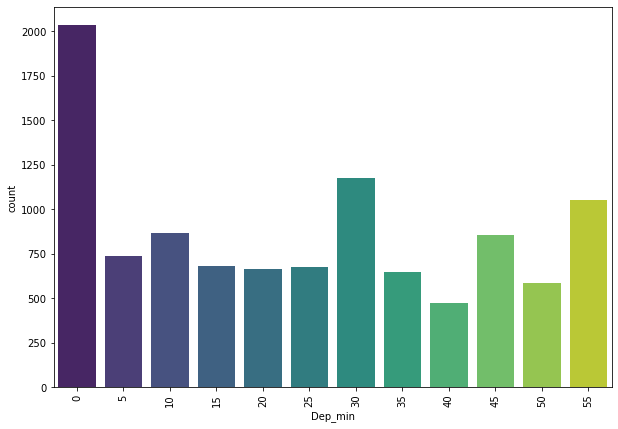

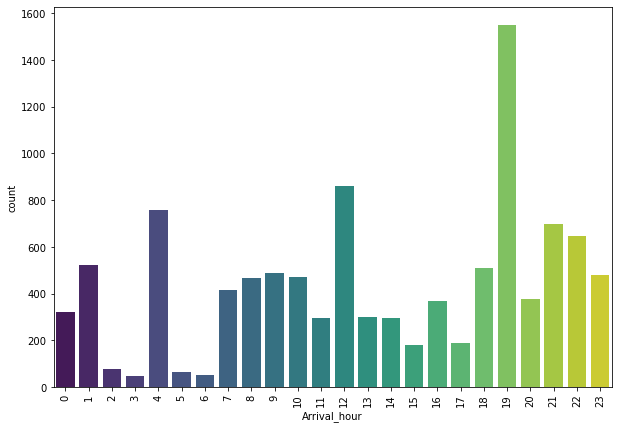

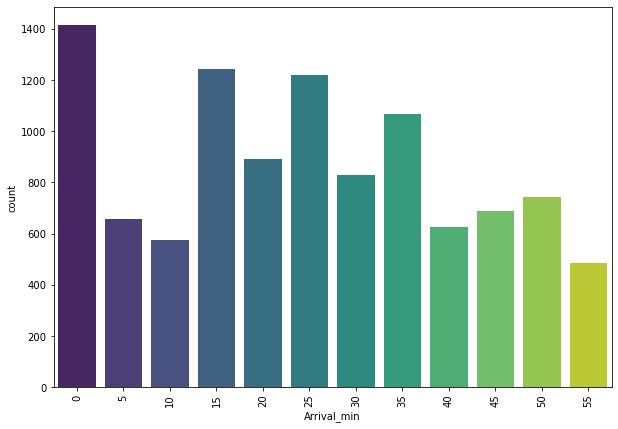

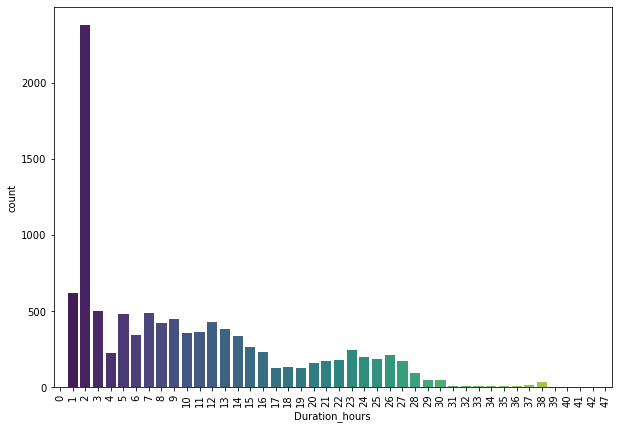

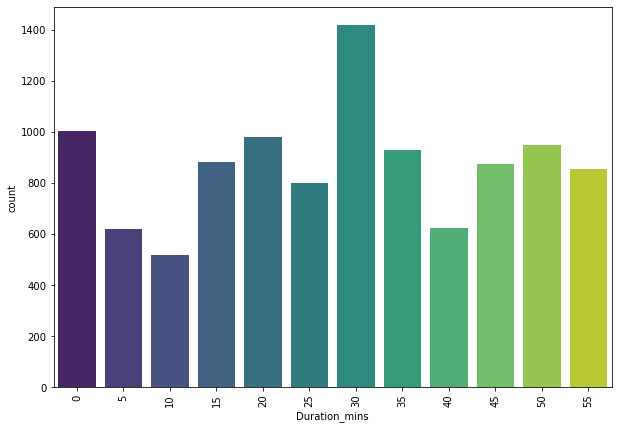

In [33]:
df_columns=['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Total_Stops','Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min',
       'Duration_hours', 'Duration_mins']
for i in df_columns:
    plt.figure(figsize=(10,7))
    plt.xticks(rotation=90)
    sns.countplot(df[i],palette='viridis')
    plt.show()

Airline:
  - 9 airlines/carriers have been mentioned in the dataset. - Indigo, Air India, JetAirways, SpiceJet,GoAir,Vistara, AirAsia,Trujet, Multiple carriers
  - JetAirways had the highest number of flights (count=3750 approx) operating, followed by Indigo (2000 counts) in the span of 3 months.
  - Least number of flights which flew in these 3 months were of Trujet. 
  
Date of Journey:
   - 12th Nov, 9th Nov, 18th Oct, 21st Oct, 6th Nov and 9th Oct have highest count of passengers. While least are on 12th Sept. In general September month shows less travels undertaken

Source:
  - The source cities are Bangalore,Kolkata,Delhi, Chennai, Mumbai.
  - The origin of most flights was Delhi airport (count=4500), followed by Kolkata (around 3000). Least flights flew from Chennai (count=Approx 500)

Destination:
 - The destination cities are Delhi, Bangalore, Cochin, Kolkata, Hyderabad.
 - The Destination was Kochi where most flights landed at the end of the day (count=4500), followed by Bangalore( almost 3000).
 - The least flights which landed were reported in Kolkata.
 
Total Stops:
 - Most flights(almost 6000) made 1 stop on their  route, while (almost 3500) flew nonstop. About 1500 made 2 stops while very few made 3 stops on their route. Handful or least flights took a 4 stop stop-over.
      
Departure hour:
- Maximum flights flew at 9Am followed by 7Am. Least flew at 3 AM.

Arrival Hour:
- Maximum flights arrived at 7pm, while least arived at 3am

Duration:
- Most flights had a duration of 2 hrs fly time.

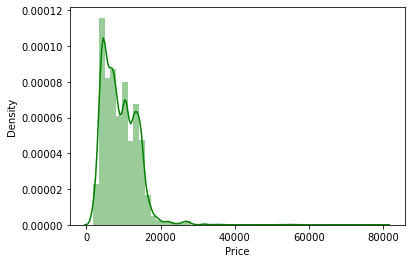

In [34]:
sns.distplot(df['Price'],color='green')
plt.ticklabel_format(style='plain')
plt.show()

- The price of flights ranged between 2.5K to 80K.
- Maximum frequncy of the price was between 5k-10K.
- The graph shows right skewness (positive skewness)

### BIVARIATE ANALYSIS:

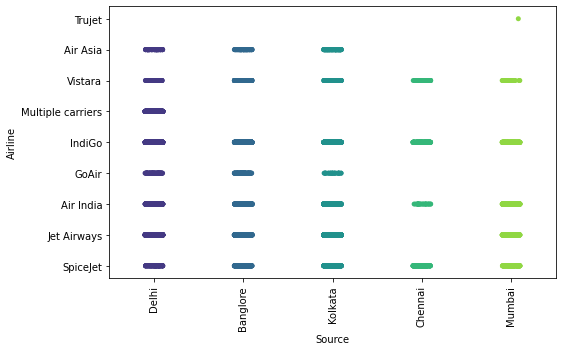

In [35]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Source",y="Airline",data=df,palette='viridis')
plt.xticks(rotation=90)
plt.show()

- Delhi had maximum number of flight flying towards their destination, while Vistara, Air India, Indigo,and Spicejet operated from all the 5 citites.
- Jet airways didnt flew from Chennai. Go Air didnt flew from Chennai and Mumbai as a source. While TruJet only flew from Mumbai.

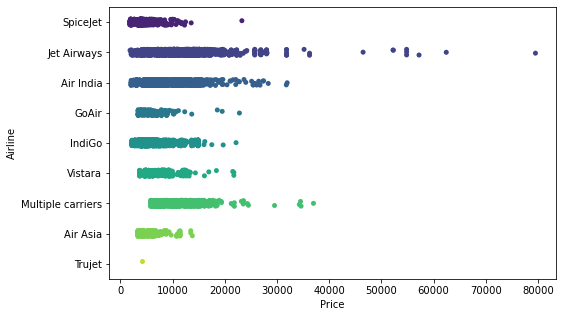

In [36]:
plt.figure(figsize=(8,5))
sns.stripplot(x="Price",y="Airline",data=df,palette='viridis')
plt.show()

- Price for Jetairways was highest of all the carriers ranging maximum mostly till 35000, while some fares rached around 80000 too.
- Least price were for TruJet which was 5000 maximum.

<Figure size 576x360 with 0 Axes>

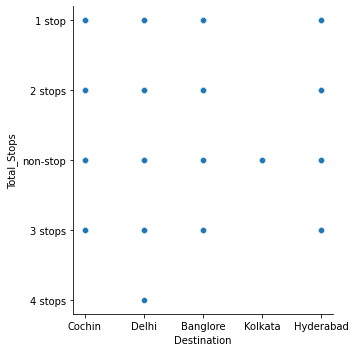

In [37]:
plt.figure(figsize=(8,5))
sns.relplot(x="Destination",y="Total_Stops",data=df,palette='viridis')
plt.show()

- Kolkata had flight which was nonstop only. Rest all places had flights with 1/2/3 stops. 
- Delhi was the only city where to reach 4 stops were taken.

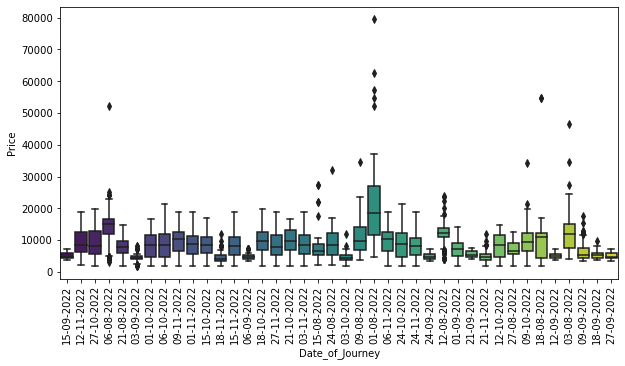

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x='Date_of_Journey',y='Price',data=df,palette='viridis')
plt.xticks(rotation=90)
plt.show()

- Most tickets price are for 1st Oct  which seems to be around 40000, followed by 3rd Oct. 
- September shows the least fare price.

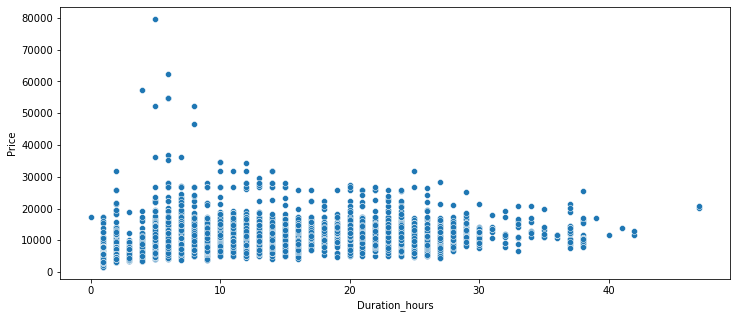

In [39]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Duration_hours',y='Price',data=df,palette='viridis')
plt.show()

- More the hours, lesser were the price of the ticket. 
- While maximum price ranged between 1-8 hrs of flight duration, between 10-28hrs, the flight price remained in a single range between 20000-30000.

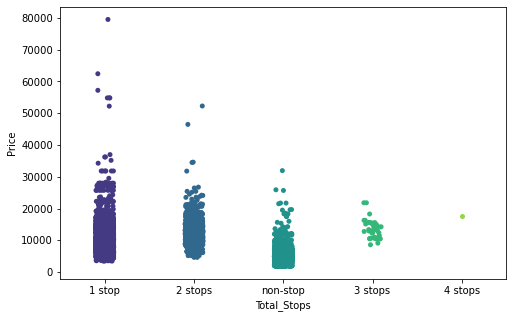

In [40]:
plt.figure(figsize=(8,5))
sns.stripplot(x='Total_Stops',y='Price',data=df,palette='viridis')
plt.show()

- More the stop, lesser was the price.
- With 1 stop, the maximum price was at 80000, but the maximum density in price was till 30000.

<Figure size 576x360 with 0 Axes>

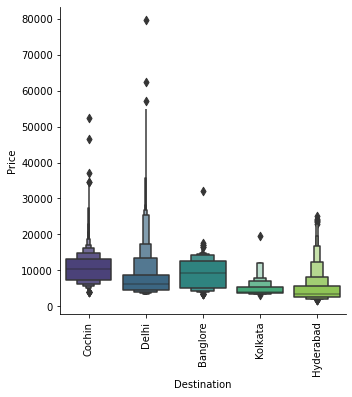

In [41]:
plt.figure(figsize=(8,5))
sns.catplot(x='Destination',y='Price',data=df,palette='viridis',kind='boxen')
plt.xticks(rotation=90)
plt.show()

Flights to Delhi as final destination had highest price of 80000, while flights to Kolkata had lowest price of about 25000.

### MULTIVARIATE ANALYSIS:

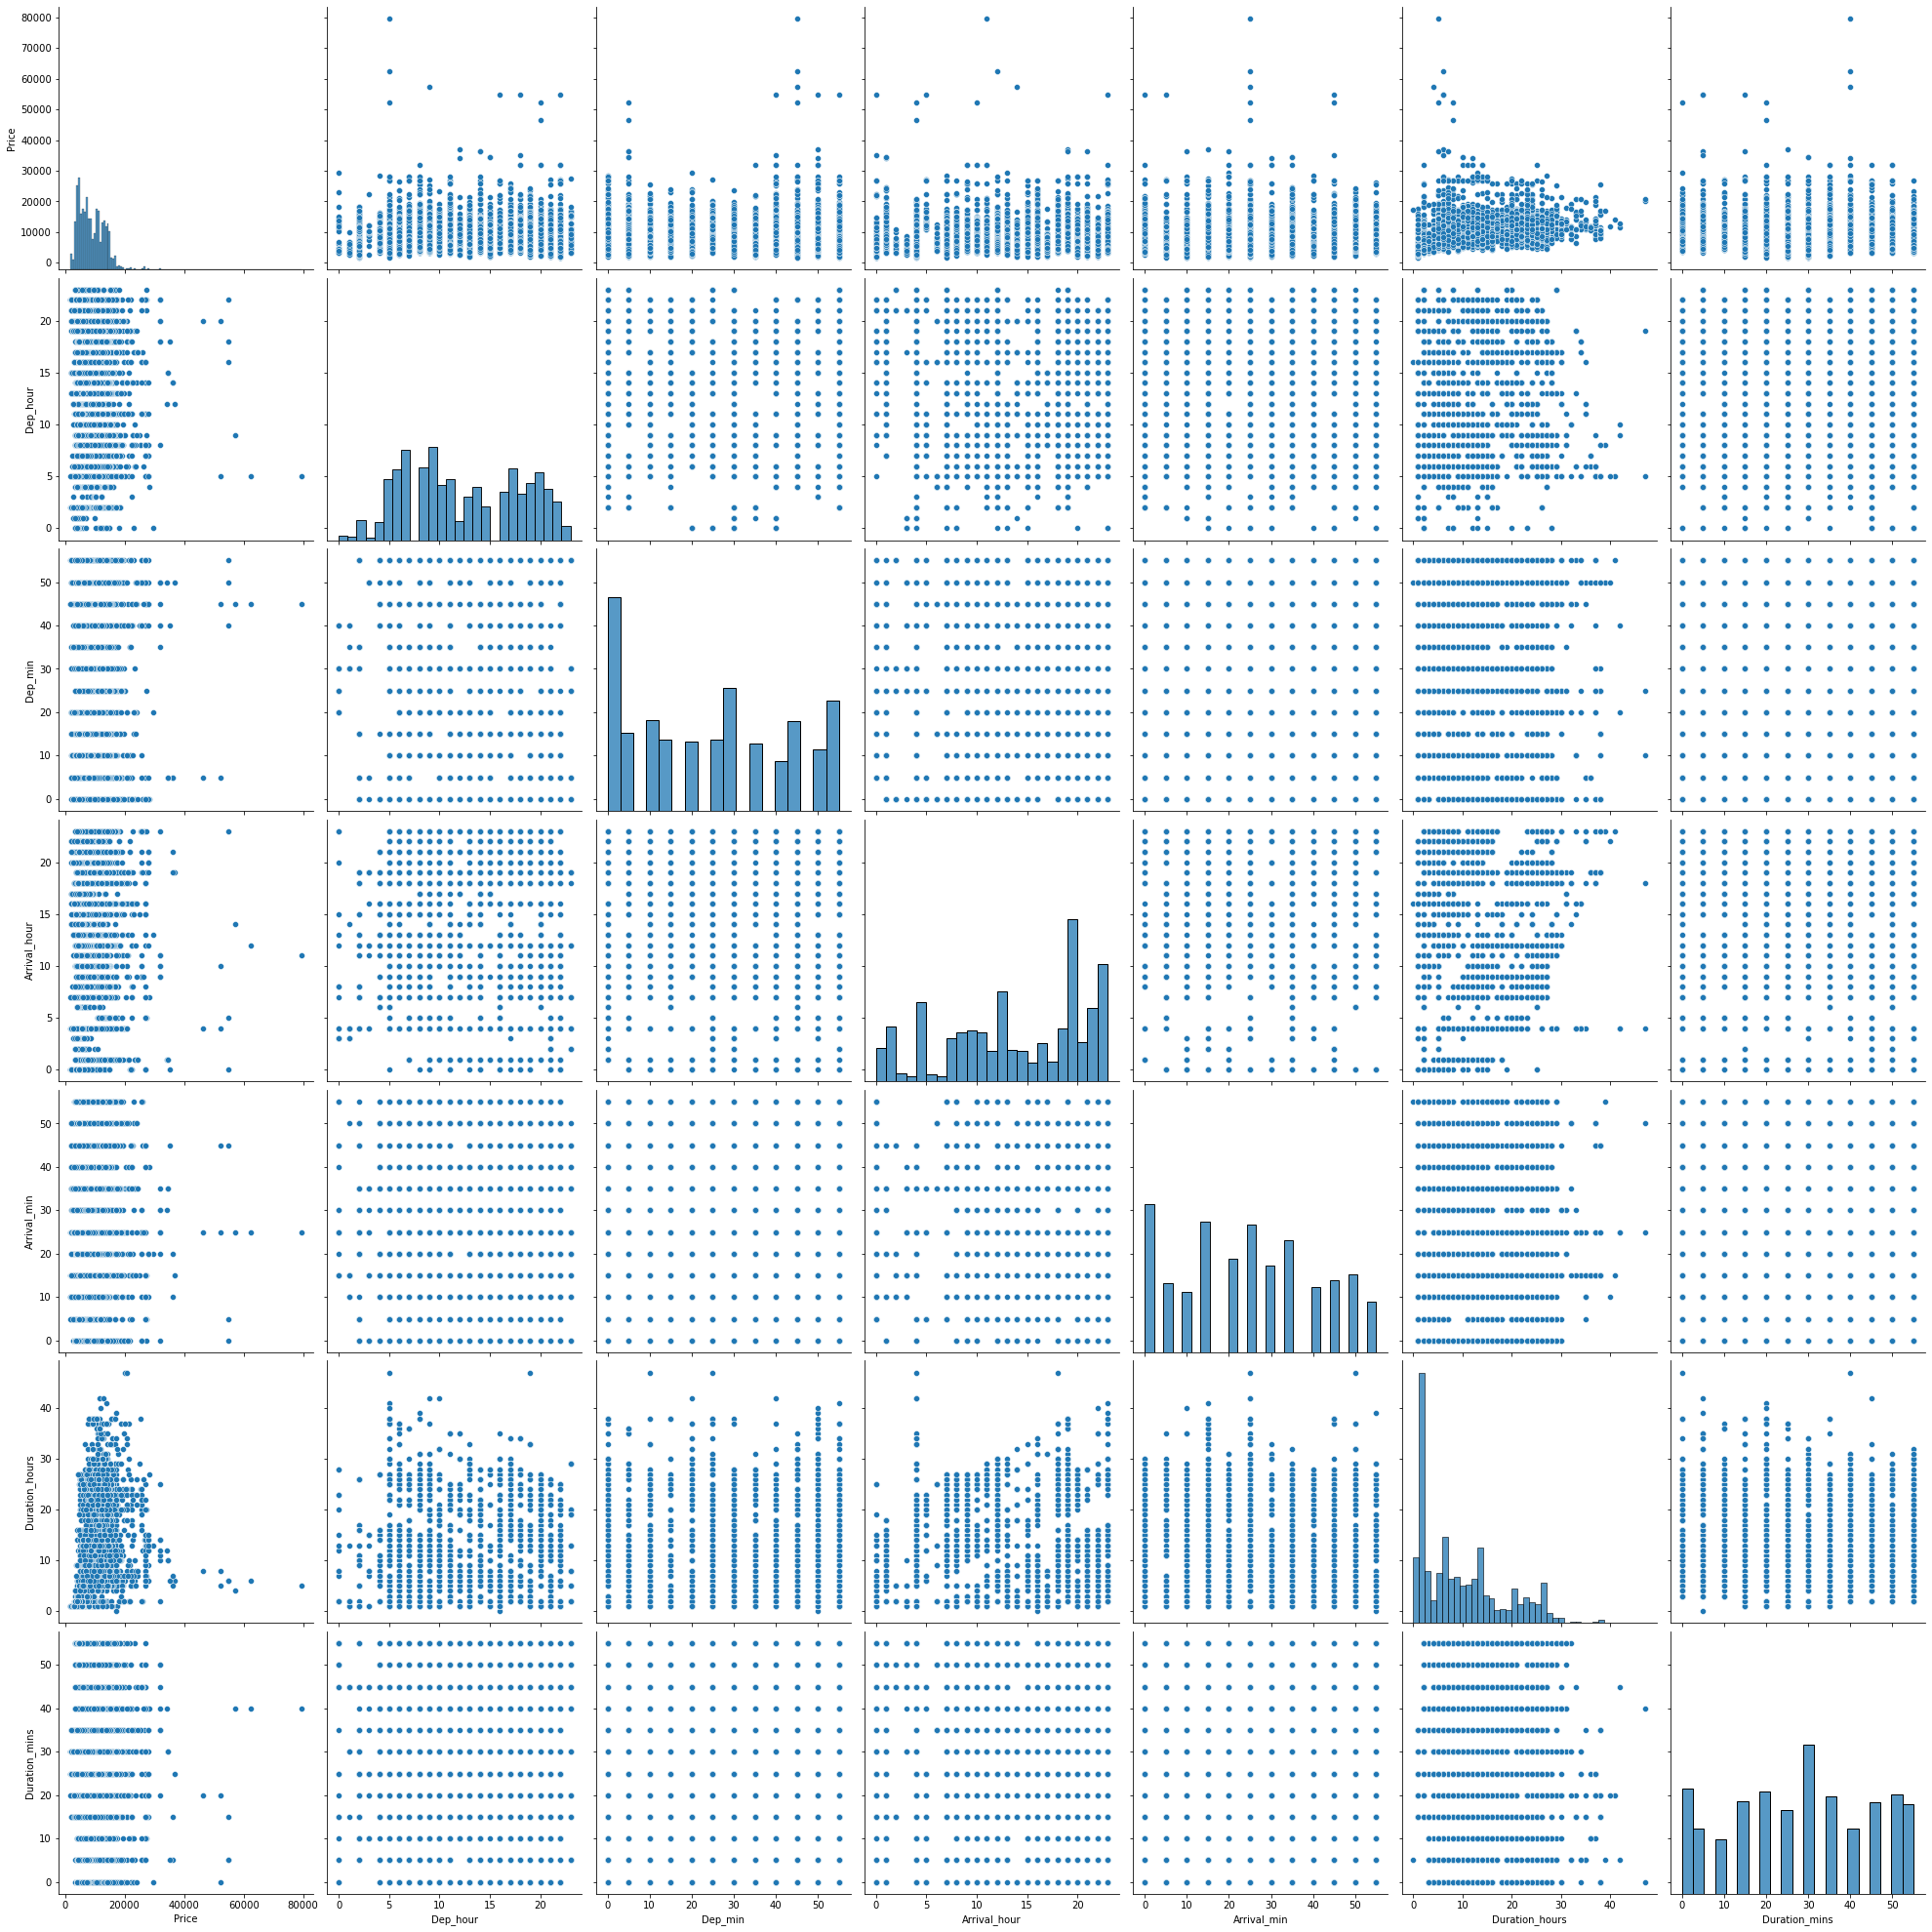

In [42]:
sns.pairplot(data=df,height=4,kind='scatter')
plt.show()

These graphs give relationship of columns with each other.

## Encoding the Datasets:

In [44]:
le =LabelEncoder()
df['Airline'] = le.fit_transform(df.Airline.values)
df['Source'] = le.fit_transform(df.Source.values)
df['Destination'] = le.fit_transform(df.Destination.values)
df['Total_Stops'] = le.fit_transform(df.Total_Stops.values)
df['Date_of_Journey'] = le.fit_transform(df.Date_of_Journey.values)

In [45]:
df

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,6,21,2,1,0,5830,8,45,13,15,4,30
1,4,19,2,1,0,10262,14,0,12,35,22,35
2,1,19,2,1,1,13381,20,15,19,15,23,0
3,4,38,2,1,0,12898,16,0,12,35,20,35
4,2,8,2,1,0,19495,14,10,19,20,5,10
...,...,...,...,...,...,...,...,...,...,...,...,...
10662,0,13,3,0,4,4107,19,55,22,25,2,30
10663,1,37,3,0,4,4145,20,45,23,20,2,35
10664,4,37,0,2,4,7229,8,20,11,20,3,0
10665,8,0,0,2,4,12648,11,30,14,10,2,40


## EXPLATORY DATA ANALYSIS(EDA)

In [46]:
df.describe()

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
count,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000,10445.000000
mean,3.615893,19.519483,1.954428,1.177310,1.462518,9026.858880,12.474581,24.402106,13.388894,24.722355,10.028626,28.209191
std,1.797189,11.505195,1.185912,1.021861,1.821259,4624.530484,5.726588,18.816326,6.853715,16.570257,8.378668,16.880774
min,0.000000,0.000000,0.000000,0.000000,0.000000,1759.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,10.000000,2.000000,0.000000,0.000000,5224.000000,8.000000,5.000000,8.000000,10.000000,2.000000,15.000000
50%,4.000000,19.000000,2.000000,1.000000,0.000000,8266.000000,11.000000,25.000000,14.000000,25.000000,8.000000,30.000000
75%,4.000000,30.000000,3.000000,2.000000,4.000000,12346.000000,18.000000,40.000000,19.000000,35.000000,15.000000,45.000000
max,8.000000,39.000000,4.000000,4.000000,4.000000,79512.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


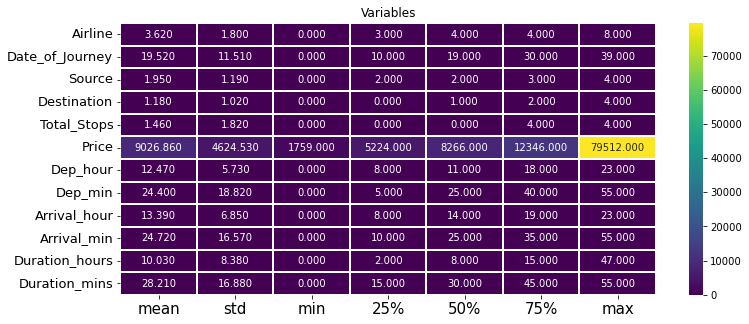

In [47]:
#plotting heat map for better understanding:
plt.figure(figsize=(12,5))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2, annot=True,fmt='0.3f',cmap='viridis')
plt.xticks(fontsize=15)
plt.yticks(fontsize=13)
plt.title("Variables")
plt.show()

### Describing the dataset:

- The difference between 75% and max is a lot in duration hours,Arrival Minutes, Arrival hour,Dep Minute, departure hour,Price. This indicates that there might be outliers in these columns. But these columns are not numerical so, we wont consider the outliers in those.
- The mean > Median in Duration Hr, departure hour,Price which means data is right skewed.
- Std deviation is high in Price column meaning the data is highly spread. But Price column is the target column so we can ignore the deviation.

## Check the correlation with the target column:

In [48]:
df.corr() #correlation 

,Airline,Date_of_Journey,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
Airline,1.000000,0.025965,-0.012167,0.053773,-0.011332,0.023497,-0.016848,-0.070966,-0.006668,-0.085939,-0.118017,-0.043348
Date_of_Journey,0.025965,1.000000,0.023391,-0.011297,0.026838,-0.170050,-0.000044,-0.010799,-0.002468,-0.026183,-0.027887,-0.014732
Source,-0.012167,0.023391,1.000000,-0.431844,-0.223245,0.014427,0.060892,-0.056080,0.027072,0.020795,0.167608,-0.145148
Destination,0.053773,-0.011297,-0.431844,1.000000,0.510027,-0.261544,-0.089272,0.096369,-0.060896,0.007318,-0.383797,0.022378
Total_Stops,-0.011332,0.026838,-0.223245,0.510027,1.000000,-0.571755,0.039690,0.049882,-0.098866,0.176519,-0.613533,0.184094
Price,0.023497,-0.170050,0.014427,-0.261544,-0.571755,1.000000,0.005836,-0.024407,0.031286,-0.085714,0.503627,-0.131223
Dep_hour,-0.016848,-0.000044,0.060892,-0.089272,0.039690,0.005836,1.000000,-0.014818,-0.003400,0.073030,-0.000010,-0.019783
Dep_min,-0.070966,-0.010799,-0.056080,0.096369,0.049882,-0.024407,-0.014818,1.000000,0.046180,-0.021461,-0.022517,0.089330
Arrival_hour,-0.006668,-0.002468,0.027072,-0.060896,-0.098866,0.031286,-0.003400,0.046180,1.000000,-0.153146,0.065674,-0.116898
Arrival_min,-0.085939,-0.026183,0.020795,0.007318,0.176519,-0.085714,0.073030,-0.021461,-0.153146,1.000000,-0.075525,0.156538


<AxesSubplot:>

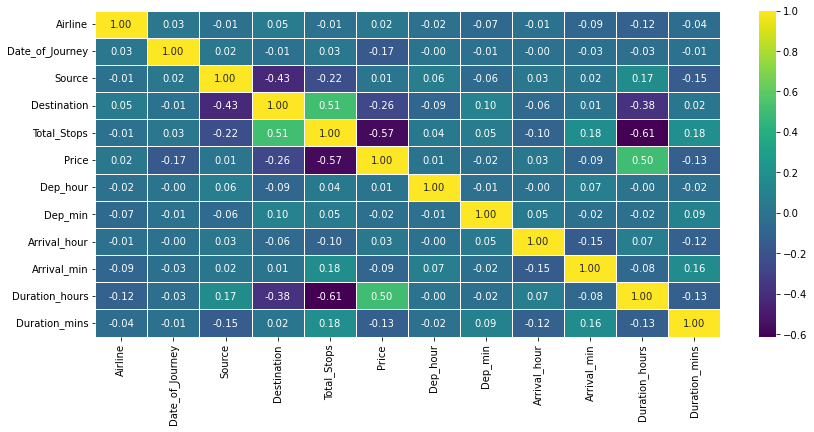

In [49]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(),cmap='viridis',annot=True,linewidth=0.5,fmt='0.2f')

Our target column is "Price":
    - Highest positive correlation is seem with the following columns:
- Duration_hours 

Almost neutral correlation:
- Arrival_hour 
- Airline 
- Source  
- Dep_hour

While negative correlation is seem with the columns:
- Journey_day 
- Destination 
- Total_Stops 

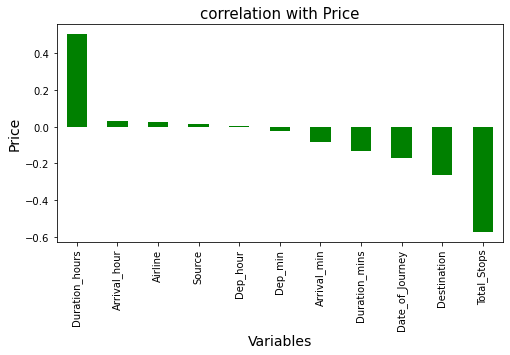

In [50]:
#checking the columns which are positively and negatively corelated with the target column:

plt.figure(figsize=(8,4))
df.corr()["Price"].sort_values(ascending=False).drop(["Price"]).plot(kind='bar', color='green')
plt.xlabel('Variables',fontsize=14)
plt.ylabel("Price",fontsize=14)
plt.title("correlation with Price",fontsize=15)
plt.show()


As seen above, graphiccaly it can be inferred that the negative correlation is seem with the columns:

- Date_of_Journey   -0.17
- Destination -- -0.26
- Total_Stops -- -0.57 (Most negative)

In [51]:
df.corr()["Price"].sort_values(ascending=False, inplace=False, kind='quicksort')

Price              1.000000
Duration_hours     0.503627
Arrival_hour       0.031286
Airline            0.023497
Source             0.014427
Dep_hour           0.005836
Dep_min           -0.024407
Arrival_min       -0.085714
Duration_mins     -0.131223
Date_of_Journey   -0.170050
Destination       -0.261544
Total_Stops       -0.571755
Name: Price, dtype: float64

# Checking Outliers :

Airline               AxesSubplot(0.125,0.657941;0.133621x0.222059)
Date_of_Journey    AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Source              AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Destination        AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Total_Stops        AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Price                 AxesSubplot(0.125,0.391471;0.133621x0.222059)
Dep_hour           AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Dep_min             AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Arrival_hour       AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Arrival_min        AxesSubplot(0.766379,0.391471;0.133621x0.222059)
Duration_hours           AxesSubplot(0.125,0.125;0.133621x0.222059)
Duration_mins         AxesSubplot(0.285345,0.125;0.133621x0.222059)
dtype: object

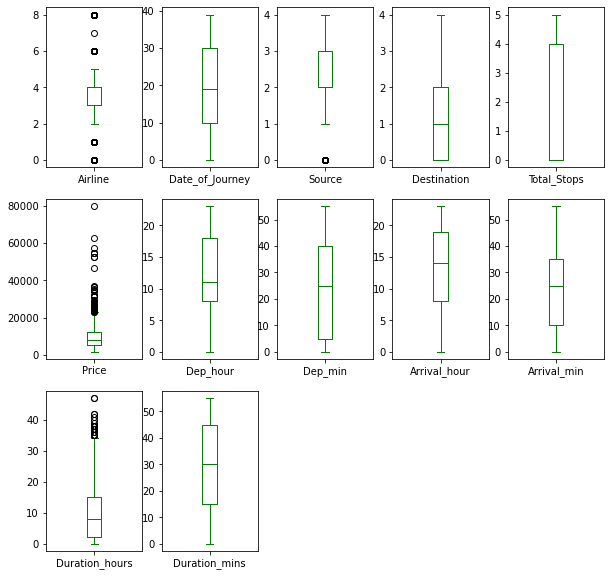

In [38]:
df.plot(kind='box',subplots=True,layout=(3,5),figsize=(10,10), color='green')

Outliers can be seen in the Duration hour column. Other columns are categorical so we will consider the numerical data only for training. We will remove the outliers with Z score method,where threshold can be considered as 3. Above this value everything will be considered as an Outlier.

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(df[['Duration_hours']]))

threshold=3
(np.where(z>3))

DF=df[(z<3).all(axis=1)]

In [53]:
print('Old_DF:',df.shape)
print('New_DF:',DF.shape)
print('total dropped rows:',df.shape[0]-DF.shape[0])

Old_DF: (10445, 12)
New_DF: (10385, 12)
total dropped rows: 60


### Percentage data loss

In [54]:
loss_percent=(10445-10385)/10445*100
print(loss_percent,'%')

0.5744375299186213 %


We can see the percent data loss as merely 0.57%, so it is acceptable.

## SKEWNESS:
Since data are Categorical, we are not removing the skewness.

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

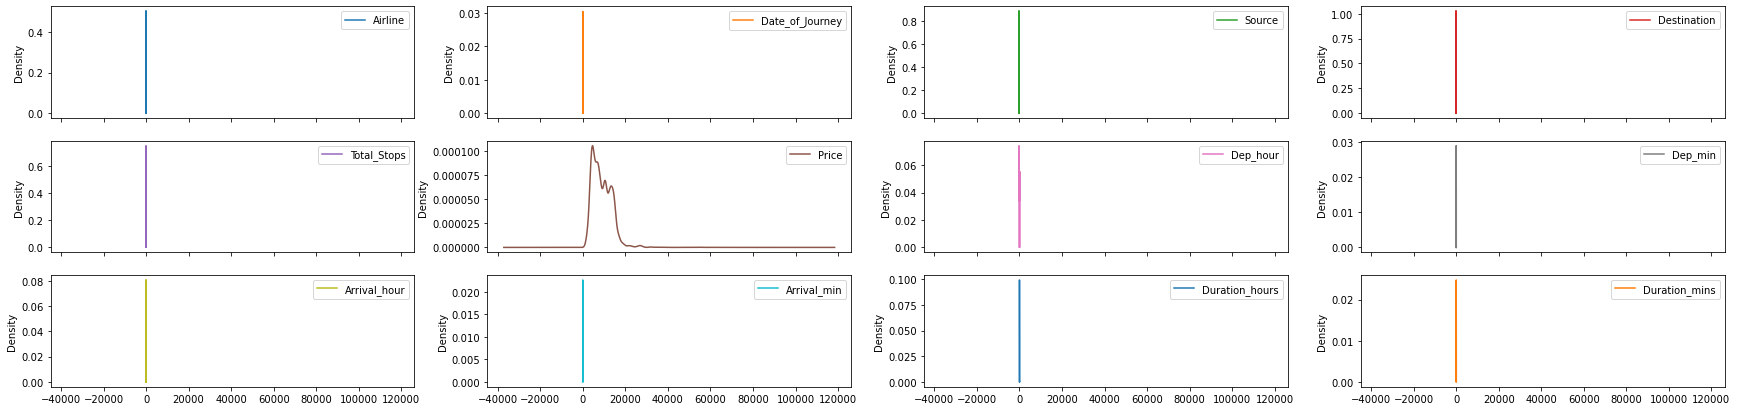

In [42]:
DF.plot(kind='kde',subplots=True,layout=(3,4),figsize=(30,7))

In [55]:
DF.skew()

Airline            0.134923
Date_of_Journey    0.053329
Source            -0.419257
Destination        0.831119
Total_Stops        0.613719
Price              1.870100
Dep_hour           0.100234
Dep_min            0.169160
Arrival_hour      -0.371241
Arrival_min        0.107086
Duration_hours     0.802432
Duration_mins     -0.091627
dtype: float64

No skewness is seen in the Test dataset as all the values are less than +/- 5 in the numerical columns.

## Scaling The Data using Standard Scaler

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=DF.drop('Price',axis=1)
y=DF['Price']
x1=sc.fit_transform(x)
x=x1
x

array([[ 1.32307052,  0.1282054 ,  0.03841254, ..., -0.58615404,
        -0.72210039,  0.10195128],
       [ 0.20866301, -0.04571049,  0.03841254, ...,  0.62007002,
         1.49348338,  0.39810906],
       [-1.46294824, -0.04571049,  0.03841254, ..., -0.58615404,
         1.61657137, -1.6749954 ],
       ...,
       [ 0.20866301,  1.51953246, -1.64477004, ..., -0.28459803,
        -0.84518838, -1.6749954 ],
       [ 2.43747802, -1.69791137, -1.64477004, ..., -0.88771006,
        -0.96827636,  0.69426684],
       [-1.46294824, -0.48050019,  0.03841254, ..., -0.58615404,
        -0.22974844, -0.49036428]])

## Splitting the data for Machine Learning:

Since the target column is continuous hence we are going the way of linear Regression:

### Checking the Best Fit Model

In [45]:
ln=LinearRegression()
maxAcc = 0
maxRS = 0
for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.22,random_state=i)
    ln = LinearRegression()
    ln.fit(x_train,y_train)
    pred = ln.predict(x_test)
    acc = r2_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
print("Maximum r2 score is ",maxAcc,"at random state ",maxRS)

Maximum r2 score is  0.458835405340167 at random state  25


### At random state 25 ,the best R2 Score is: 46%

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=25)
x_train.shape,x_test.shape, y_train.shape,y_test.shape

((8100, 11), (2285, 11), (8100,), (2285,))

## Finding the R2 score and Cross Validation Score

In [57]:
model=[Lasso(),Ridge(),ElasticNet(),SGDRegressor(), RandomForestRegressor(),SVR(),KNeighborsRegressor(),
       GradientBoostingRegressor(),AdaBoostRegressor(),ExtraTreesRegressor()]

for m in model:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.22, random_state=24)
    
    # Training the model
    m.fit(x_train, y_train)
    
    # Predicting y_test
    pred = m.predict(x_test)
    
    # Accuracy Score
    R2_score = (r2_score(y_test,pred)*100)
    print("R2 score:", R2_score)
    
    #Mean Squared error
    MSE= mean_squared_error(y_test,pred)
    print("MSE:", MSE)
    
    # Cross Validation Score
    cv_score = (cross_val_score(m, x, y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of R2score minus cv scores
    result = R2_score - cv_score
    print("For model",m,"R2score - Cross Validation Score is", result)
    print("--"*10)

R2 score: 45.161573730664784
MSE: 10969904.882108845
Cross Validation Score: 40.48524893416921
For model Lasso() R2score - Cross Validation Score is 4.676324796495571
--------------------
R2 score: 45.16110770268724
MSE: 10969998.106567198
Cross Validation Score: 40.48377651765428
For model Ridge() R2score - Cross Validation Score is 4.677331185032962
--------------------
R2 score: 41.378179655860215
MSE: 11726736.832907338
Cross Validation Score: 37.535399071331824
For model ElasticNet() R2score - Cross Validation Score is 3.8427805845283913
--------------------
R2 score: 45.05676166621857
MSE: 10990871.537348464
Cross Validation Score: 40.44031273502874
For model SGDRegressor() R2score - Cross Validation Score is 4.616448931189829
--------------------
R2 score: 75.55472838046069
MSE: 4890043.765417338
Cross Validation Score: 75.97371759096762
For model RandomForestRegressor() R2score - Cross Validation Score is -0.41898921050693616
--------------------
R2 score: 5.1728232473424285
MS

### The CV score for Extra Trees Regression model is 74.04% which is similar to the R2 Score of 74.03%.
- This score we selected after using the absolute value of R2-CV score between both Extra Trees and Random Forest Regressor.
- From this, we can say that the Extra Trees Regression Algorithm works best for the given model.

### Best fit line

<function matplotlib.pyplot.show(close=None, block=None)>

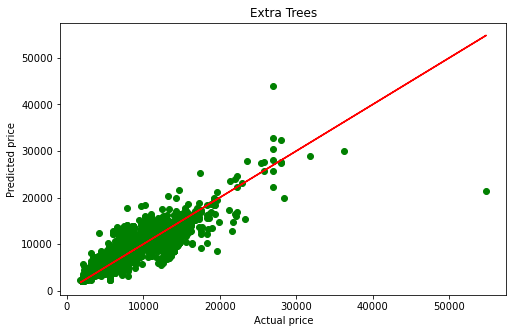

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(x=y_test,y=pred_testet,color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel("Actual price",fontsize=10)
plt.ylabel("Predicted price",fontsize=10)
plt.title("Extra Trees")
plt.show

#### The best fit line is covering all of the point == model is trained and is a good fit.

## Hyper parameter tuning of Extra Trees

In [63]:
from sklearn.model_selection import GridSearchCV

#creating parameters to pass in Grid serach
para={'criterion': ['squared_error', 'friedman_mse'],'max_features': ['auto','sqrt','log2'],
      'max_depth': [8,9,10,11], 'min_samples_leaf':[1,2,3,4]}

In [64]:
GCV=GridSearchCV(ExtraTreesRegressor(),para,cv=5)
GCV.fit(x_train,y_train) 
GCV.best_params_  

{'criterion': 'squared_error',
 'max_depth': 11,
 'max_features': 'auto',
 'min_samples_leaf': 1}

In [65]:
#Final Model:
Et=ExtraTreesRegressor(criterion= 'squared_error',max_depth=11,max_features='auto',min_samples_leaf= 1)
Et.fit(x_train,y_train)
predfm=Et.predict(x_test)
print('R2_score:',r2_score(y_test,predfm)*100)
print("Best R2 Score for GCV best estimator", et, "is",r2_score(y_test,predfm)*100)
print('Error:')
print('Mean absolute error:',mean_absolute_error(y_test,predfm))
print('Mean squared error:',mean_squared_error(y_test,predfm))
print('Root mean squared error:',np.sqrt(mean_squared_error(y_test,predfm)))

R2_score: 78.7090180661928
Best R2 Score for GCV best estimator ExtraTreesRegressor() is 78.7090180661928
Error:
Mean absolute error: 1406.7120329002469
Mean squared error: 4259058.155926075
Root mean squared error: 2063.748568970085


### R2 Score increased from 74% to 79% after hypertuning.

## Saving the model

We are using the obj. method to save the model.

In [66]:
#saving the model 
import joblib
joblib.dump(Et,'FlightPred.obj')

['FlightPred.obj']

In [67]:
FM=joblib.load('FlightPred.obj')

### Conclusion:

- Best R2 Score for GCV best estimator ExtraTreesRegressor({'criterion': 'squared_error', 'max_depth': 11, 'max_features':'auto', 'min_samples_leaf': 1}) is 79%, which means the model works 79% for predicting the fares of flights.

Error:
- Mean absolute error: 1406.7120329002469
- Mean squared error: 4259058.155926075
- Root mean squared error: 2063.748568970085

- The predicted price is displayed below:

In [68]:
Final=pd.DataFrame({'Actual':y_test,'Predicted':predfm})
Final

,Actual,Predicted
7817,8016,7229.332256
10220,10262,12912.197520
522,7229,5810.930565
2763,12692,12306.636995
3445,13587,10786.405755
...,...,...
7762,9663,11905.870109
185,6961,5621.191610
5928,17524,9564.172890
3742,3210,4571.323803


- With these predictions we can know the fare of the flights efficiently.

# Thank you.